In [1]:
#define path
wesley_ds = "/files"
new_ds = "/Msc2"
kaggle_ds = "/archive/Data/genres_original"
main_path = ""

In [2]:
#choose the dataset
chooser = wesley_ds

In [3]:
DATASET_PATH = main_path+chooser
# DATASET_PATH = "../../../Music"
JSON_PATH_NEW = main_path + '' + 'complete_3_first_specTonnetz_Msc2_energy.json'
JSON_PATH = main_path + '' + 'complete_3_first_specTonnetz_energy.json'
SAMPLE_RATE = sr =  22050
DURATION = 30 #measured in seconds 
SAMPLES_PER_TRACK = SAMPLE_RATE*DURATION

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import librosa
import librosa.display
from IPython.display import Audio
from tqdm import tqdm 
from sklearn.model_selection import train_test_split, TimeSeriesSplit
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, LSTM, Bidirectional, GRU, BatchNormalization, LeakyReLU
from tensorflow.keras.utils import to_categorical
import numpy as np
# import torch
# import torch.nn as nn
# import torchvision
# import torchvision.transforms as transforms
import os
import math
import json
import random
import mutagen

In [5]:
# loading the saved Json file
def load_data(path):
    with open(path, 'r') as fp:
        data = json.load(fp)
    #Convert lists into numpy arrays
    # inputs = np.dstack(( data['spectral'], data['tonnetz']))
    # inputs = data['spectral']
    inputs = [librosa.power_to_db(np.array(isi).T, ref=np.max).T for isi in data['spectral']]
    # inputs = np.dstack(([librosa.power_to_db(np.array(isi).T, ref=np.max).T for isi in data['spectral']], data['tonnetz']))
    targets = data['energy'] 
    return np.array(inputs), np.array(targets)

In [6]:
with open(JSON_PATH, 'r') as fp:
    data = json.load(fp)
    print(data['mapping'])

['BIG ROOM', 'DEEP HOUSE', 'BASS HOUSE', 'FUTURE HOUSE', 'ELECTRO HOUSE', 'XtraInitialKey', 'C Maj', 'B Maj', 'Db Maj', '.ipynb_checkpoints']


In [6]:
inputs, targets = load_data(JSON_PATH)

In [ ]:
inputs, targets = load_data(JSON_PATH)
inputs2, targets2 = load_data(JSON_PATH_NEW)
#convert folder to key name
remapper = ['8B', '1B', '3B']
targets3 = np.array([remapper[isi-1] for isi in targets2])
targets2 = targets3
inputs3 = np.vstack((inputs,inputs2))
targets3 = np.hstack((targets, targets2))
inputs = inputs3
targets = targets3

In [ ]:
print(inputs.shape)

(7250, 65, 134)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

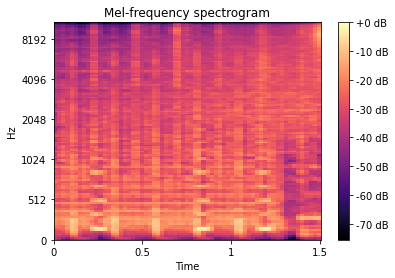

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# S_db = librosa.power_to_db(inputs[0,:,:].T, ref=np.max)
img = librosa.display.specshow(inputs[-1,:,:].T, x_axis ='time', y_axis='mel')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(128, 65)


[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

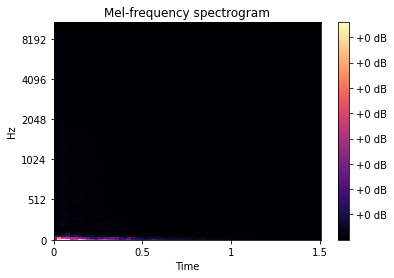

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
signal, sr = librosa.load(DATASET_PATH+'/BIG ROOM/01 Bigenesis _ Jadon Fonka - Fluto (Extended.mp3')
specconv = librosa.feature.melspectrogram(signal[0 : 22050*3], sr=22050, n_fft=4084, hop_length=1024)
S_db = librosa.power_to_db(specconv, ref=np.max)
print(S_db.shape)
img = librosa.display.specshow(specconv, x_axis ='time', y_axis='mel')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [7]:
targets = np.array([int(isi)-5 for isi in targets])

In [8]:
np.unique(targets, return_counts=True)

(array([0, 1, 2, 3, 4]), array([  80,  840, 2990, 2380,  370], dtype=int64))

In [ ]:
outp_key = ['1A', '2A', '3A', '4A', '5A', '6A', '7A', '8A', '9A', '10A', '11A', '12A', '1B', '2B', '3B', '4B', '5B', '6B', '7B', '8B', '9B', '10B', '11B', '12B']
#for key purpose
targets2 = np.array([outp_key.index(isi) for isi in targets])
print(targets2)

for isi in targets:
    print(outp_key[outp_key.index(isi)], isi)

Streaming output truncated to the last 5000 lines.
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
1A 1A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
6A 6A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
2A 2A
4A 4A
4A 4A
4A 4A
4A 4A
4A 4A
4A 4A
4A 4A
4A 4A
4A 4A
4A 4A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
12A 12A
4B 4B
4B 4B
4B 4B
4B 4B
4B 4B
4B 4B
4B 4B
4B 4B
4B 4B
4B 4B
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
8A 8A
4A 4A
4A 

In [ ]:
print(np.unique(targets2, return_counts=True))
print(len(outp_key))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23]), array([ 490,  300,  120, 1710,  250,  870,  220,  310,  780,  130,  960,
        220,  200,   30,  200,   30,   50,   30,   20,  210,   30,   20,
         20,   50]))
24


In [ ]:
# Keras Model

In [9]:
inputs.shape

(6660, 65, 128)

In [10]:
model = Sequential()


# model.add(GRU(800, input_shape=(inputs.shape[1], inputs.shape[2])))

model.add(GRU(600, return_sequences=True, input_shape=(inputs.shape[1], inputs.shape[2])))
# model.add(GRU(200, return_sequences=True))
model.add(Dropout(0.5))
# model.add(BatchNormalization())
model.add(GRU(300))

model.add(Dropout(0.5))
# model.add(BatchNormalization())

# model.add(Dense(24, 'softmax'))
model.add(Dense(5, 'softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])



model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 65, 600)           1314000   
_________________________________________________________________
dropout (Dropout)            (None, 65, 600)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 300)               811800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 1505      
Total params: 2,127,305
Trainable params: 2,127,305
Non-trainable params: 0
_________________________________________________________________


In [11]:
#Spectral Whitening
from sklearn.preprocessing import StandardScaler
nw_arr = []
for isi in inputs[:,:,0:128]:
  scaler = StandardScaler()
  nw_arr.append(scaler.fit_transform(isi.T).T) # Do Averaging on each frequency band, across time-domain, then transpose to time-axis again
print(np.array(nw_arr).shape)
inputs = np.dstack((np.array(nw_arr), inputs[:,:,128:134])) # do this if want to combine with rest feature
# inputs = np.array(nw_arr) # do this if only want to use melspectogram
print(inputs.shape)

(6660, 65, 128)
(6660, 65, 128)


In [12]:
#Per Sample STDD

nw_arr = []
for isi in inputs[:,:,0:128]:
  avg = np.mean(isi, dtype=np.float64)
  stds = np.std(isi, dtype=np.float64)
  nw_arr.append((isi-avg)) # Do Averaging on each frequency band, across time-domain, then transpose to time-axis again
print(np.array(nw_arr).shape)
inputs = np.dstack((np.array(nw_arr), inputs[:,:,128:134])) # do this if want to combine with rest feature
# inputs = np.array(nw_arr) # do this if only want to use melspectogram
print(inputs.shape)

(6660, 65, 128)
(6660, 65, 128)


In [13]:
#x10scaler
inputs = np.dstack((inputs[:,:,0:128]*10, inputs[:,:,128:134])) #as only first 128 features are Melspectogram
print(inputs.shape)

(6660, 65, 128)


In [14]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.1)

In [20]:
np.unique(targets_train, return_counts=True)

(array([0, 1, 2, 3, 4]), array([ 142, 1518, 5380, 4290,  658], dtype=int64))

In [17]:
inputs_train, targets_train = augment_ds(inputs_train, targets_train)

(11988, 65, 128) (11988,)


In [18]:
history = model.fit(inputs_train, targets_train,
          validation_data=(inputs_test, targets_test),
          epochs = 10,
          batch_size=100)

Epoch 1/10
120/120 [==============================] - 78s 654ms/step - loss: 1.2490 - accuracy: 0.4827 - val_loss: 1.0418 - val_accuracy: 0.5721
Epoch 2/10
120/120 [==============================] - 78s 651ms/step - loss: 0.7955 - accuracy: 0.6653 - val_loss: 0.8023 - val_accuracy: 0.6832
Epoch 3/10
120/120 [==============================] - 80s 668ms/step - loss: 0.4633 - accuracy: 0.8217 - val_loss: 0.5706 - val_accuracy: 0.8093
Epoch 4/10
120/120 [==============================] - 78s 647ms/step - loss: 0.2675 - accuracy: 0.9028 - val_loss: 0.9355 - val_accuracy: 0.7538
Epoch 5/10
120/120 [==============================] - 80s 665ms/step - loss: 0.2057 - accuracy: 0.9262 - val_loss: 0.5639 - val_accuracy: 0.8468
Epoch 6/10
120/120 [==============================] - 84s 697ms/step - loss: 0.1292 - accuracy: 0.9549 - val_loss: 0.6608 - val_accuracy: 0.8288
Epoch 7/10
120/120 [==============================] - 83s 691ms/step - loss: 0.1410 - accuracy: 0.9503 - val_loss: 0.7108 - val_ac

In [21]:
model.save('saved_model/ENERGY_2')


INFO:tensorflow:Assets written to: saved_model/ENERGY_2\assets


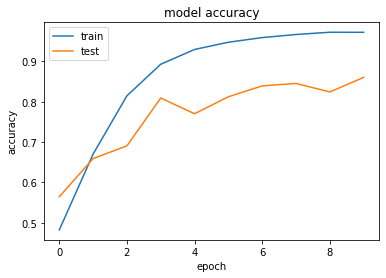

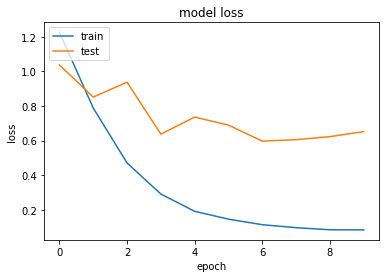

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [ ]:
print(tf.argmax(model(inputs_test), axis=1))

tf.Tensor(
[3 3 3 1 3 3 3 3 3 2 2 2 2 2 3 4 2 2 2 2 3 2 2 3 2 2 2 2 0 2 2 3 2 3 3 3 3
 2 2 2 2 3 2 2 1 2 2 2 3 3 2 2 2 2 2 2 2 1 2 3 2 1 3 3 2 1 1 2 1 2 3 0 3 1
 2 3 4 4 3 3 2 2 1 3 2 3 2 2 2 2 1 3 2 3 3 2 2 3 3 2 2 3 3 3 2 2 2 2 3 1 2
 2 1 2 1 2 1 3 3 3 2 2 3 2 2 3 3 2 1 3 3 3 2 3 2 1 2 2 1 3 2 2 2 3 1 2 3 0
 2 2 2 2 1 3 3 2 3 2 2 3 2 3 1 3 1 3 3 4 3 2 2 2 3 3 3 3 3 2 2 1 2 2 2 3 2
 3 4 2 2 2 2 2 3 2 2 2 2 3 2 3 3 3 2 3 1 3 2 1 3 2 3 3 2 2 3 3 2 2 1 3 3 3
 3 3 2 2 1 2 3 3 3 3 3 3 2 3 3 1 3 1 2 3 2 1 2 3 2 3 3 3 2 3 3 3 3 2 2 2 2
 1 3 3 3 2 1 2 2 2 2 2 2 2 2 3 2 1 3 2 1 2 2 2 2 3 1 2 1 2 3 2 2 2 4 3 3 1
 2 3 2 3 3 2 3 2 3 2 3 1 4 2 2 3 2 2 2 4 1 2 1 2 3 4 1 3 1 2 3 1 2 3 3 2 2
 3 3 3 3 4 3 1 2 1 3 2 2 3 2 2 3 2 3 1 3 3 3 3 2 2 3 3 2 2 2 2 3 3 2 3 3 1
 2 3 3 3 2 3 3 3 3 3 3 3 2 3 2 2 3 2 3 3 3 3 4 2 1 3 1 3 2 3 3 1 2 2 2 2 2
 2 2 2 3 2 3 3 2 2 3 2 2 2 3 3 3 2 3 2 3 2 3 3 3 2 3 1 2 3 2 2 3 3 3 2 2 1
 2 2 3 4 3 3 3 4 3 3 1 3 3 3 3 2 2 3 2 3 3 3 2 3 4 2 3 2 3 3 4 2 4 3 2 3 4
 3 2 2 3 2 3 2

              precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.86      0.84      0.85        75
           2       0.87      0.85      0.86       295
           3       0.84      0.91      0.87       253
           4       0.96      0.71      0.81        34

    accuracy                           0.86       666
   macro avg       0.88      0.82      0.84       666
weighted avg       0.86      0.86      0.86       666



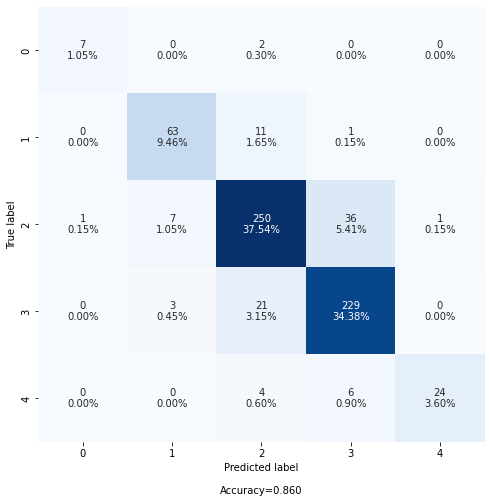

In [ ]:
### Model Analysis
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
cf_matrix = confusion_matrix(targets_test, tf.argmax(model(inputs_test), axis=1))
make_confusion_matrix(cf_matrix, figsize=(8,8), cbar=False)
print(classification_report(targets_test, tf.argmax(model(inputs_test), axis=1)))

# plot_confusion_matrix(confusion_matrix=confusion_matrix(targets2, tf.argmax(model(inputs), axis=1)),display_labels=[isi for isi in range(24)]).plot()


In [ ]:
# Pytorch

In [16]:
def augment_ds(inputs, outputs):
    inputs_cpy = np.array(inputs)
    inputs_ori = np.array(inputs)
    outputs_cpy = np.array(outputs)
    # Adding Noise 
    
    for i in range(inputs_cpy.shape[0]):
        s = np.random.rand(inputs_cpy.shape[1], inputs_cpy.shape[2])
        inputs_cpy[i] = inputs_cpy[i] + s

    #join dataset
    inputs_cpy = np.vstack((inputs_cpy, inputs_ori))
    outputs_cpy = np.hstack((outputs, outputs))
    print(inputs_cpy.shape, outputs_cpy.shape)
    return inputs_cpy, outputs_cpy

In [ ]:
# Model Definition
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, prob_do):
        super(RNN, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.do = nn.Dropout(p=prob_do)
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) 
        out, _ = self.gru(x, h0)  
        out = out[:, -1, :]
        out = self.do(out)
        out = torch.sigmoid(self.fc(out))
        return out

In [ ]:
def create_models(input_size, hidden_size, num_classes, device, prob_do = 0.5, num_layers = 1):
    return RNN(input_size, hidden_size, num_layers, num_classes, prob_do).to(device)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

def train_models(num_epoch, batch_size, learning_rate, inputs, outputs, splitts, device, folds = 0):
    train_index, test_index = splitts[folds]
    x_train = inputs[train_index]
    y_train = outputs[train_index]
    
    x_train, y_train = augment_ds(x_train, y_train)
    x_test = inputs[test_index]
    y_test = outputs[test_index]
    
    models = create_models(inputs.shape[-1], 600, 5, device, prob_do = 0.4)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(models.parameters(), lr=learning_rate)
    
    x_train = torch.from_numpy(x_train)
    y_train = torch.from_numpy(y_train)
    x_test = torch.from_numpy(x_test)
    y_test = torch.from_numpy(y_test)
#     x_val = torch.from_numpy(x_val)
#     y_val = torch.from_numpy(y_val)
    
    print(x_train.shape)
    train_loss = []
    test_loss = []
    acc_arr = []
    train = TensorDataset(x_train, y_train)
    test = TensorDataset(x_test, y_test)
#     val = TensorDataset(x_val, y_val)
    
    train_loader = DataLoader(train, batch_size=batch_size, shuffle=False, drop_last=True)
    test_loader = DataLoader(test, batch_size=batch_size, shuffle=False, drop_last=True)
#     val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)
#     test_loader_one = DataLoader(test, batch_size=1, shuffle=False, drop_last=True)
    for epoch in range(num_epoch):
        # training sequences
        batch_losses = []
        for x_batch, y_batch in train_loader:
            x_batch = x_batch.view([batch_size, -1, inputs.shape[-1]]).to(device).to(torch.float32)
            y_batch = y_batch.to(device).to(torch.int64)
            
            models.train()
            y_hat = models(x_batch)
            loss = criterion(y_hat, y_batch)

            # Backward and optimize
            loss.backward()
            # Updates parameters and zeroes gradients
            optimizer.step()
            optimizer.zero_grad()
            
            batch_losses.append(loss.item())
        train_loss.append(np.mean(batch_losses))
        
        #testing sequences
        with torch.no_grad():
            batch_val_losses = []
            for x_val, y_val in test_loader:
                x_val = x_val.view([batch_size, -1, inputs.shape[-1]]).to(device).to(torch.float32)
                y_val = y_val.to(device).to(torch.int64)
                models.eval()
                yhat = models(x_val)
                val_loss = criterion(yhat, y_val)
                batch_val_losses.append(val_loss.item())
            test_loss.append(np.mean(batch_val_losses))
        
        print(f"[{epoch+1}/{num_epoch}] Training loss: {train_loss[-1]:.4f}\t Validation loss: {test_loss[-1]:.4f}", end="\n")
            
    return models,train_loss, test_loss, acc_arr

In [ ]:
def evaluation(models, test_loader,device, batch_size):
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        batch_acc = []
        #labels = labels.to(device)
        for x_test, y_test in test_loader:
            x_test = x_test.view([batch_size, -1, x_test.shape[-1]]).to(device)
            y_test = y_test.to(device)
            x_test = x_test.to(torch.float32)
            y_test = y_test.to(torch.int64)
            models.eval()  
            outputs = models(x_test)
            # max returns (value ,index)
            _, predicted = torch.max(outputs.data, 1)
            n_samples += y_test.size(0)
#             print(y_test)
            n_correct += (predicted == y_test).sum().item()
            acc = 100.0 * n_correct / n_samples
            batch_acc.append(acc)
#         print(n_correct)
        print(f'Accuracy: {np.mean(batch_acc) :.4f} %')

In [ ]:
inputs, targets = load_data(JSON_PATH)

In [ ]:
#device conf
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_classes = 5 #deprecated
num_epochs = 30
batch_size = 100
learning_rate = 0.001

hidden_size = 500 #deprecated
num_layers = 1 #deprecated

from sklearn.model_selection import KFold as StratifiedKFold
# manage dataset

# split training and testing
x_train, x_val, y_train, y_val = train_test_split(inputs, targets, test_size=0.1)
x_val = torch.from_numpy(x_val)
y_val = torch.from_numpy(y_val)
val = TensorDataset(x_val, y_val)
val_loader = DataLoader(val, batch_size=batch_size, shuffle=False, drop_last=True)

skf = StratifiedKFold(n_splits=10)
output_lst = ["BASS HOUSE", "BIG ROOM", "DEEP HOUSE", "ELECTRO HOUSE", "FUTURE HOUSE"]
outp_key = ['1A', '2A', '3A', '4A', '5A', '6A', '7A', '8A', '9A', '10A', '11A', '12A', '1B', '2B', '3B', '4B', '5B', '6B', '7B', '8B', '9B', '10B', '11B', '12B']

#for genre purpose
targets = np.array([isi-1 for isi in targets])
print(targets.shape)
row_skf = [content for content in skf.split(x_train, y_train)]



(6640,)


In [ ]:
inputs.shape

(6640, 65, 13)

In [ ]:
# for index in range(10):
#     model, tl, tsl, acr = train_models(num_epochs, batch_size, learning_rate, x_train, y_train, row_skf, device, folds = index)
#     evaluation(model, val_loader,device, batch_size)
# # evaluation(model, ldr,device, batch_size)

model, tl, tsl, acr = train_models(num_epochs, batch_size, learning_rate, x_train, y_train, row_skf, device, folds = 0)
evaluation(model, val_loader,device, batch_size)

(10756, 65, 13) (10756,)
torch.Size([10756, 65, 13])
[1/30] Training loss: 1.3879	 Validation loss: 1.3356
[2/30] Training loss: 1.2820	 Validation loss: 1.3031
[3/30] Training loss: 1.2111	 Validation loss: 1.2640
[4/30] Training loss: 1.1423	 Validation loss: 1.1975
[5/30] Training loss: 1.0904	 Validation loss: 1.1760
[6/30] Training loss: 1.0642	 Validation loss: 1.1949
[7/30] Training loss: 1.0393	 Validation loss: 1.1658
[8/30] Training loss: 1.0177	 Validation loss: 1.1606
[9/30] Training loss: 1.0070	 Validation loss: 1.1533
[10/30] Training loss: 1.0073	 Validation loss: 1.1728
[11/30] Training loss: 1.0073	 Validation loss: 1.1765
[12/30] Training loss: 0.9997	 Validation loss: 1.1493
[13/30] Training loss: 0.9787	 Validation loss: 1.1321
[14/30] Training loss: 0.9573	 Validation loss: 1.1244
[15/30] Training loss: 0.9611	 Validation loss: 1.1217
[16/30] Training loss: 0.9548	 Validation loss: 1.1260
[17/30] Training loss: 0.9576	 Validation loss: 1.1352
[18/30] Training loss

In [ ]:
model.eval()
torch.save(model.state_dict(), '81_3_genre_inf.pth')

In [ ]:
#optional: export as ONNX model
model.eval()
batch_sizer = 1
x = torch.randn(batch_sizer, 65, 13, requires_grad=True).to(device)

torch_out = model(x)

# Export the model
torch.onnx.export(model,               # model being run
                  x,                         # model input (or a tuple for multiple inputs)
                  "Genre__cls__81_3.onnx",   # where to save the model (can be a file or file-like object)
                  export_params=True,        # store the trained parameter weights inside the model file
                  opset_version=10,          # the ONNX version to export the model to
                  do_constant_folding=True,  # whether to execute constant folding for optimization
                  input_names = ['input'],   # the model's input names
                  output_names = ['output'], # the model's output names
                 )

C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\onnx\symbolic.py:173: UserWarning: ONNX export failed on RNN/GRU/LSTM because batch_first not supported
  warnings.warn("ONNX export failed on " + op + " because " + msg + " not supported")


RuntimeError: ONNX export failed: Couldn't export operator aten::gru

Defined at:
<ipython-input-22-8e1b1a5a1eeb>(14): forward
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\nn\modules\module.py(481): _slow_forward
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\nn\modules\module.py(491): __call__
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\jit\__init__.py(294): forward
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\nn\modules\module.py(493): __call__
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\jit\__init__.py(231): get_trace_graph
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\onnx\utils.py(225): _trace_and_get_graph_from_model
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\onnx\utils.py(266): _model_to_graph
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\onnx\utils.py(363): _export
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\onnx\utils.py(131): export
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\torch\onnx\__init__.py(25): export
<ipython-input-40-84ad4c138d80>(16): <module>
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\IPython\core\interactiveshell.py(3343): run_code
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\IPython\core\interactiveshell.py(3263): run_ast_nodes
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\IPython\core\interactiveshell.py(3072): run_cell_async
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\IPython\core\async_helpers.py(68): _pseudo_sync_runner
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\IPython\core\interactiveshell.py(2895): _run_cell
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\IPython\core\interactiveshell.py(2867): run_cell
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\ipykernel\zmqshell.py(539): run_cell
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\ipykernel\ipkernel.py(302): do_execute
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\gen.py(162): _fake_ctx_run
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\gen.py(234): wrapper
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\ipykernel\kernelbase.py(538): execute_request
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\gen.py(162): _fake_ctx_run
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\gen.py(234): wrapper
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\ipykernel\kernelbase.py(261): dispatch_shell
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\gen.py(162): _fake_ctx_run
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\gen.py(234): wrapper
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\ipykernel\kernelbase.py(358): process_one
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\gen.py(775): run
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\gen.py(162): _fake_ctx_run
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\gen.py(814): inner
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\ioloop.py(741): _run_callback
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\ioloop.py(688): <lambda>
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\asyncio\events.py(145): _run
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\asyncio\base_events.py(1462): _run_once
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\asyncio\base_events.py(442): run_forever
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\tornado\platform\asyncio.py(199): start
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\ipykernel\kernelapp.py(612): start
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\traitlets\config\application.py(664): launch_instance
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\site-packages\ipykernel_launcher.py(16): <module>
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\runpy.py(85): _run_code
C:\Users\KRPTN\Anaconda3\envs\alphapose\lib\runpy.py(193): _run_module_as_main


Graph we tried to export:
graph(%input : Float(1, 65, 13),
      %gru.weight_ih_l0 : Float(1800, 13),
      %gru.weight_hh_l0 : Float(1800, 600),
      %gru.bias_ih_l0 : Float(1800),
      %gru.bias_hh_l0 : Float(1800),
      %fc.weight : Float(5, 600),
      %fc.bias : Float(5)):
  %7 : Long() = onnx::Constant[value={0}](), scope: RNN
  %8 : Tensor = onnx::Shape(%input), scope: RNN
  %9 : Long() = onnx::Gather[axis=0](%8, %7), scope: RNN
  %10 : Long() = onnx::Constant[value={1}](), scope: RNN
  %11 : Long() = onnx::Constant[value={600}](), scope: RNN
  %12 : Tensor = onnx::Unsqueeze[axes=[0]](%10)
  %13 : Tensor = onnx::Unsqueeze[axes=[0]](%9)
  %14 : Tensor = onnx::Unsqueeze[axes=[0]](%11)
  %15 : Tensor = onnx::Concat[axis=0](%12, %13, %14)
  %16 : Float(1, 1, 600) = onnx::ConstantOfShape[value={0}](%15), scope: RNN
  %17 : Float(1, 1, 600) = onnx::Cast[to=1](%16), scope: RNN
  %18 : Long() = onnx::Constant[value={1}](), scope: RNN/GRU[gru]
  %19 : Long() = onnx::Constant[value={1}](), scope: RNN/GRU[gru]
  %20 : Double() = onnx::Constant[value={0}](), scope: RNN/GRU[gru]
  %21 : Long() = onnx::Constant[value={0}](), scope: RNN/GRU[gru]
  %22 : Long() = onnx::Constant[value={0}](), scope: RNN/GRU[gru]
  %23 : Long() = onnx::Constant[value={1}](), scope: RNN/GRU[gru]
  %24 : Float(1!, 65, 600), %25 : Float(1, 1, 600) = aten::gru(%input, %17, %gru.weight_ih_l0, %gru.weight_hh_l0, %gru.bias_ih_l0, %gru.bias_hh_l0, %18, %19, %20, %21, %22, %23), scope: RNN
  %26 : Long() = onnx::Constant[value={-1}](), scope: RNN
  %27 : Float(1, 600) = onnx::Gather[axis=1](%24, %26), scope: RNN/Dropout[do]
  %28 : Float(1, 5) = onnx::Gemm[alpha=1, beta=1, transB=1](%27, %fc.weight, %fc.bias), scope: RNN/Dropout[do]
  %output : Float(1, 5) = onnx::Sigmoid(%28), scope: RNN
  return (%output)


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions_one_hot = model.predict(inputs_test)
print(targets_test.shape, predictions_one_hot.shape)
# cm = confusion_matrix(targets_test, predictions_one_hot.argmax(axis=1))
# print(cm)
con_mat = tf.math.confusion_matrix(labels=targets_test, predictions=predictions_one_hot.argmax(axis=1)).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = outp_key, 
                     columns = outp_key)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
signal, sr = librosa.load("../raw_dataset/files/BIG ROOM/01 Agus Zack _ Devbanz - Workout (Extended M.mp3") # len(signal) = 661794  # sr is 22050 by default 

In [ ]:
signal.shape[0]
mfcc = librosa.feature.mfcc(signal[0 : 22050*30],
                                                   sr = 22050,
                                                   n_fft = 4084,
                                                   n_mfcc = 13,
                                                   hop_length = 1024)
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# (rate,sig) = wav.read("file.wav")
mfcc_feat = mfcc

ig, ax = plt.subplots()
mfcc_data= np.swapaxes(mfcc_feat, 0 ,1)
cax = ax.imshow(mfcc_data, interpolation='nearest', cmap=cm.coolwarm, origin='lower', aspect='auto')
ax.set_title('MFCC')
#Showing mfcc_data
plt.show()
#Showing mfcc_feat
plt.plot(mfcc_feat)
plt.show()

In [ ]:
mfcc.shape

In [ ]:
# Clustering

In [ ]:
!pip install tslearn

     |████████████████████████████████| 793 kB 5.4 MB/s 


In [ ]:
from tslearn.clustering import TimeSeriesKMeans
km = TimeSeriesKMeans(n_clusters=len(outp_key), metric="euclidean")
km.fit(inputs_train)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=50,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=24, n_init=1, n_jobs=None,
                 random_state=None, tol=1e-06, verbose=0)

In [ ]:
# cluster rename

In [ ]:
nonexist_val = [12,14,19] #list ground truth dont have data references

cluster_nwmaps = [-1 for isi in outp_key] # mapping cluster -> real output

for isi in np.unique(targets_train, return_counts=True)[0]:
  # print(inputs_train[targets_train.tolist().index(isi),:,:].shape)

  tmps = km.predict(inputs_train[targets_train.tolist().index(isi),:,:].reshape(1,65,25))
  r = 0
  while ((r<len(tmps)-1) and (cluster_nwmaps[tmps[r]] != -1)):
    r += 1
  if (cluster_nwmaps[tmps[r]] != -1):
    # print("error")
    # raise ValueError('Two cluster point to same output target')
    nonexist_val.append(isi)
  else:
    cluster_nwmaps[tmps[r]] = isi
r = 0
for isi in range(len(cluster_nwmaps)):
  if (cluster_nwmaps[isi]==-1):
    cluster_nwmaps[isi] = nonexist_val[r] # map the rest of cluster that dont have reference as nonexist_val
    r += 1

In [ ]:
# eval cluster

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(targets_test, [cluster_nwmaps[isi] for isi in km.predict(inputs_test)]))

              precision    recall  f1-score   support

           0       0.04      0.11      0.05        37
           1       0.10      0.11      0.11        35
           2       0.00      0.00      0.00         8
           3       0.25      0.05      0.08       177
           4       0.00      0.00      0.00        20
           5       0.24      0.04      0.08        89
           6       0.04      0.05      0.04        20
           7       0.00      0.00      0.00        33
           8       0.15      0.15      0.15        91
           9       0.00      0.00      0.00        10
          10       0.13      0.06      0.08        97
          11       0.00      0.00      0.00        20
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         6
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
